In [92]:
#Import Librairie
from bs4 import BeautifulSoup as bs
import requests as re 
import pandas as pd 


In [93]:
#Data parsing 
url ='https://www.cbinsights.com/research-unicorn-companies'
unicorn_data=re.get(url).text

In [94]:
unicorn_soup = bs(unicorn_data, 'html.parser')
unicorn_table = unicorn_soup.find_all('table')

In [95]:
len(unicorn_table)

1

In [96]:
unicorn_df =pd.read_html(str(unicorn_table),flavor='bs4')[0]
unicorn_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$63,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [97]:
unicorn_df.shape

(323, 7)

In [98]:
unicorn_df.dropna()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$63,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
318,Sentry,$3,2/18/2021,United States,San Francisco,Other,"New Enterprise Associates, Accel, Bond"
319,Kraken,$2.92,6/25/2019,United States,San Francisco,Fintech,"Bnk To The Future, Trammell Ventures, SBI Inve..."
320,Workrise,$2.9,9/30/2019,United States,Austin,Internet software & services,"Founders Fund, Quantum Energy Partners, Bedroc..."
321,Loft,$2.9,1/3/2020,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Monashees+, Andreessen Horowitz, QED Investors"


In [99]:
#Data processing & parsing 
continent_df = pd.read_csv('continents.csv')
continent_df.head()

,Entity,Code,Year,Continent
0,Abkhazia,OWID_ABK,2015,Asia
1,Afghanistan,AFG,2015,Asia
2,Akrotiri and Dhekelia,OWID_AKD,2015,Asia
3,Albania,ALB,2015,Europe
4,Algeria,DZA,2015,Africa


In [100]:
unicorn_df['Continent'] = ""

In [101]:
def getContinent(country):
    con = str(continent_df.loc[(continent_df['Entity']==country),'Continent'].values)
    list_of_chars = ['[', ']', "''",' ']
    translation_table = str.maketrans('', '', ''.join(list_of_chars))
    con = con.translate(translation_table)
    return con

In [102]:
for a in unicorn_df.index:
    unicorn_df['Continent'][a] = getContinent(unicorn_df['Country'].values[a])

unicorn_df.head(15)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Asia
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",NorthAmerica
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Asia
3,Stripe,$63,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",NorthAmerica
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Oceania
5,Checkout.com,$40,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",Europe
6,Revolut,$33,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",Europe
7,Epic Games,$31.5,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",NorthAmerica
8,Databricks,$31,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",NorthAmerica
9,Fanatics,$31,6/6/2012,United States,Jacksonville,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H...",NorthAmerica


In [103]:
year = unicorn_df['Date Joined'].str.split('/', n=2, expand=True)
year = year[2].astype('int32')
unicorn_df['Year'] = year
unicorn_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Asia,2017
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",NorthAmerica,2012
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Asia,2018
3,Stripe,$63,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",NorthAmerica,2014
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Oceania,2018


In [104]:
unicorn_df.isnull().sum()

Company             0
Valuation ($B)      0
Date Joined         0
Country             0
City                2
Industry            0
Select Investors    0
Continent           0
Year                0
dtype: int64

In [105]:
import numpy as np
np.where(unicorn_df['Select Investors'].isnull())[0]

array([], dtype=int64)

In [106]:
unicorn_df[unicorn_df['Continent'] == ''].index

Int64Index([], dtype='int64')

In [107]:
unicorn_df.loc[unicorn_df['Continent']=='']

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year


In [108]:
# checking country name in continent table
continent_df[continent_df['Entity'].str.contains('Czech')]

,Entity,Code,Year,Continent
64,Czechia,CZE,2015,Europe
65,Czechoslovakia,OWID_CZS,2015,Europe


In [109]:
import re
def getContinent(country):
    if(country in continent_df['Entity'].values):
        con = str(continent_df.loc[(continent_df['Entity']==country),'Continent'].values)
    else:
        if len(country.split(' '))==1:
            con = str(continent_df.loc[(continent_df['Entity'].str.contains(country, flags=re.I, regex=True)),'Continent'].values[0])
        else:
            country = country.split(' ')[0]
            con = str(continent_df.loc[(continent_df['Entity'].str.contains(country, flags=re.I, regex=True)),'Continent'].values[0])
        
    list_of_chars = ['[', ']', "''",' ']
    translation_table = str.maketrans('', '', ''.join(list_of_chars))
    con = con.translate(translation_table)
    return con

In [110]:
unicorn_df.dtypes

Company             object
Valuation ($B)      object
Date Joined         object
Country             object
City                object
Industry            object
Select Investors    object
Continent           object
Year                 int32
dtype: object

In [111]:
unicorn_df.head() #check it once again

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Asia,2017
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",NorthAmerica,2012
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Asia,2018
3,Stripe,$63,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",NorthAmerica,2014
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Oceania,2018


In [112]:
arr_ind = unicorn_df['Industry'].unique()
list_ind = arr_ind.tolist()


In [113]:
import pprint #not really necessary but it will help to prettify the dictionary groups_words
ind_lower = {v: v.lower() for v in list_ind}

my_list = []
groups_words = {}
for key, value in ind_lower.items():
    if value in groups_words.keys():
        my_list = groups_words[value]
        my_list.append(key)
        groups_words[value] = my_list
    else:
        groups_words[value] = [key]

pprint.pprint(groups_words)

{'artificial intelligence': ['Artificial intelligence'],
 'auto & transportation': ['Auto & transportation'],
 'consumer & retail': ['Consumer & retail'],
 'cybersecurity': ['Cybersecurity'],
 'data management & analytics': ['Data management & analytics'],
 'e-commerce & direct-to-consumer': ['E-commerce & direct-to-consumer'],
 'edtech': ['Edtech'],
 'fintech': ['Fintech'],
 'hardware': ['Hardware'],
 'health': ['Health'],
 'internet software & services': ['Internet software & services'],
 'mobile & telecommunications': ['Mobile & telecommunications'],
 'other': ['Other'],
 'supply chain, logistics, & delivery': ['Supply chain, logistics, & delivery'],
 'travel': ['Travel']}


In [114]:
unicorn_df[unicorn_df['Industry']=='Artificial intelligence'].count()

Company             18
Valuation ($B)      18
Date Joined         18
Country             18
City                18
Industry            18
Select Investors    18
Continent           18
Year                18
dtype: int64

In [115]:
unicorn_df['Industry'].loc[unicorn_df['Industry']=='Artificial intelligence'] = 'Artificial Intelligence'

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [116]:
unicorn_df[unicorn_df['Industry']=='Artificial intelligence'].count()

Company             0
Valuation ($B)      0
Date Joined         0
Country             0
City                0
Industry            0
Select Investors    0
Continent           0
Year                0
dtype: int64

In [117]:
unicorn_df.drop_duplicates()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Asia,2017
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",NorthAmerica,2012
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Asia,2018
3,Stripe,$63,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",NorthAmerica,2014
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Oceania,2018
...,...,...,...,...,...,...,...,...,...
318,Sentry,$3,2/18/2021,United States,San Francisco,Other,"New Enterprise Associates, Accel, Bond",NorthAmerica,2021
319,Kraken,$2.92,6/25/2019,United States,San Francisco,Fintech,"Bnk To The Future, Trammell Ventures, SBI Inve...",NorthAmerica,2019
320,Workrise,$2.9,9/30/2019,United States,Austin,Internet software & services,"Founders Fund, Quantum Energy Partners, Bedroc...",NorthAmerica,2019
321,Loft,$2.9,1/3/2020,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Monashees+, Andreessen Horowitz, QED Investors",SouthAmerica,2020


In [118]:
unicorn_df.to_csv('unicorn_dataset_fix.csv', index=False)

In [119]:
unicorn_df.to_csv('unicorn_dataset_fix.xlsx', index=False)

#Begin the exploration
Filtering Data with Specific Conditions
1. Display unicorn data from Asia with Artificial Intelligence industry then sort by their valuation

In [120]:
ai_asia_data = unicorn_df[(unicorn_df['Continent'] == 'Asia') & (unicorn_df['Industry'] == 'Artificial Intelligence')].sort_values(by='Valuation ($B)', ascending=False)
ai_asia_data

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
138,Horizon Robotics,$5,2/27/2019,China,Beijing,Artificial Intelligence,"Hillhouse Capital Management, Linear Venture, ...",Asia,2019
192,MEGVII,$4,10/31/2017,China,Beijing,Artificial Intelligence,"Ant Financial Services Group, Russia-China Inv...",Asia,2017
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Asia,2017


2. Display unicorn data with investors containing 'capital' word and from fintech industry

In [121]:
fintech_capital = unicorn_df[(unicorn_df['Select Investors'].str.contains('capital', flags=re.I, na=False, regex=True)) & (unicorn_df['Industry']=='Fintech')]
fintech_capital

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
3,Stripe,$63,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",NorthAmerica,2014
6,Revolut,$33,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",Europe,2018
10,Chime,$25,3/5/2019,United States,San Francisco,Fintech,"Forerunner Ventures, Crosslink Capital, Homebrew",NorthAmerica,2019
21,Ripple,$15,12/20/2019,United States,San Francisco,Fintech,"IDG Capital, Venture51, Lightspeed Venture Par...",NorthAmerica,2019
23,Plaid,$13.5,12/11/2018,United States,San Francisco,Fintech,"New Enterprise Associates, Spar Capital, Index...",NorthAmerica,2018
29,Brex,$12.3,10/5/2018,United States,San Francisco,Fintech,"DST Global, Ribbit Capital, Greenoaks Capital ...",NorthAmerica,2018
35,Deel,$12,4/21/2021,United States,San Francisco,Fintech,"Andreessen Horowitz, Spark Capital, Y Combinator",NorthAmerica,2021
40,Bolt,$11,10/8/2021,United States,San Francisco,Fintech,"Activant Capital, Tribe Capital, General Atlantic",NorthAmerica,2021
52,Digital Currency Group,$10,11/1/2021,United States,New York,Fintech,"Ribbit Capital, capitalG, Softbank Group",NorthAmerica,2021
53,KuCoin,$10,5/10/2022,Seychelles,Victoria,Fintech,"IDG Capital, Matrix Partners China, Jump Crypto",Africa,2022


3. Display 5 countries with highest number of unicorn

In [122]:
unicorn_df.groupby('Country').count()['Company'].sort_values(ascending=False).head()

Country
United States     190
China              32
India              23
United Kingdom     16
Germany             9
Name: Company, dtype: int64

4. Display the industry that has most company number from each continent.

In [123]:
grouped_df = unicorn_df.groupby(['Continent','Industry']).count()
result = grouped_df.loc[grouped_df.groupby('Continent')['Company'].idxmax()]
result['Company']

Continent     Industry                       
Africa        Fintech                             1
Asia          E-commerce & direct-to-consumer    11
Europe        Fintech                            20
NorthAmerica  Internet software & services       52
Oceania       Fintech                             1
SouthAmerica  E-commerce & direct-to-consumer     3
Name: Company, dtype: int64

5. Display the company name and country with highest valuation in 2019.

In [124]:
filtered_df = unicorn_df[unicorn_df['Year']==2017]
filtered_df = filtered_df.sort_values(by='Valuation ($B)',ascending=False)
filtered_df[['Company','Country','Valuation ($B)']].head(1)

,Company,Country,Valuation ($B)
61,Niantic,United States,$9


In [125]:
arr_ind = unicorn_df['Industry'].unique()
list_ind = arr_ind.tolist()

In [126]:
import pprint #not really necessary but it will help to prettify the dictionary groups_words
ind_lower = {v: v.lower() for v in list_ind}

my_list = []
groups_words = {}
for key, value in ind_lower.items():
    if value in groups_words.keys():
        my_list = groups_words[value]
        my_list.append(key)
        groups_words[value] = my_list
    else:
        groups_words[value] = [key]

pprint.pprint(groups_words)

{'artificial intelligence': ['Artificial Intelligence'],
 'auto & transportation': ['Auto & transportation'],
 'consumer & retail': ['Consumer & retail'],
 'cybersecurity': ['Cybersecurity'],
 'data management & analytics': ['Data management & analytics'],
 'e-commerce & direct-to-consumer': ['E-commerce & direct-to-consumer'],
 'edtech': ['Edtech'],
 'fintech': ['Fintech'],
 'hardware': ['Hardware'],
 'health': ['Health'],
 'internet software & services': ['Internet software & services'],
 'mobile & telecommunications': ['Mobile & telecommunications'],
 'other': ['Other'],
 'supply chain, logistics, & delivery': ['Supply chain, logistics, & delivery'],
 'travel': ['Travel']}


In [127]:
unicorn_df[unicorn_df['Industry']=='Artificial intelligence'].count()

Company             0
Valuation ($B)      0
Date Joined         0
Country             0
City                0
Industry            0
Select Investors    0
Continent           0
Year                0
dtype: int64

In [128]:
unicorn_df['Industry'].loc[unicorn_df['Industry']=='Artificial intelligence'] = 'Artificial Intelligence'

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [129]:
unicorn_df[unicorn_df['Industry']=='Artificial intelligence'].count()

Company             0
Valuation ($B)      0
Date Joined         0
Country             0
City                0
Industry            0
Select Investors    0
Continent           0
Year                0
dtype: int64

In [130]:
fintech_capital = unicorn_df[(unicorn_df['Select Investors'].str.contains('capital', flags=re.I, na=False, regex=True)) & (unicorn_df['Industry']=='Fintech')]
fintech_capital

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Continent,Year
3,Stripe,$63,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",NorthAmerica,2014
6,Revolut,$33,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",Europe,2018
10,Chime,$25,3/5/2019,United States,San Francisco,Fintech,"Forerunner Ventures, Crosslink Capital, Homebrew",NorthAmerica,2019
21,Ripple,$15,12/20/2019,United States,San Francisco,Fintech,"IDG Capital, Venture51, Lightspeed Venture Par...",NorthAmerica,2019
23,Plaid,$13.5,12/11/2018,United States,San Francisco,Fintech,"New Enterprise Associates, Spar Capital, Index...",NorthAmerica,2018
29,Brex,$12.3,10/5/2018,United States,San Francisco,Fintech,"DST Global, Ribbit Capital, Greenoaks Capital ...",NorthAmerica,2018
35,Deel,$12,4/21/2021,United States,San Francisco,Fintech,"Andreessen Horowitz, Spark Capital, Y Combinator",NorthAmerica,2021
40,Bolt,$11,10/8/2021,United States,San Francisco,Fintech,"Activant Capital, Tribe Capital, General Atlantic",NorthAmerica,2021
52,Digital Currency Group,$10,11/1/2021,United States,New York,Fintech,"Ribbit Capital, capitalG, Softbank Group",NorthAmerica,2021
53,KuCoin,$10,5/10/2022,Seychelles,Victoria,Fintech,"IDG Capital, Matrix Partners China, Jump Crypto",Africa,2022


In [131]:
unicorn_df.groupby('Country').count()['Company'].sort_values(ascending=False).head()

Country
United States     190
China              32
India              23
United Kingdom     16
Germany             9
Name: Company, dtype: int64

In [132]:
grouped_df = unicorn_df.groupby(['Continent','Industry']).count()
result = grouped_df.loc[grouped_df.groupby('Continent')['Company'].idxmax()]
result['Company']

Continent     Industry                       
Africa        Fintech                             1
Asia          E-commerce & direct-to-consumer    11
Europe        Fintech                            20
NorthAmerica  Internet software & services       52
Oceania       Fintech                             1
SouthAmerica  E-commerce & direct-to-consumer     3
Name: Company, dtype: int64

In [133]:
filtered_df = unicorn_df[unicorn_df['Year']==2019]
filtered_df = filtered_df.sort_values(by='Valuation ($B)',ascending=False)
filtered_df[['Company','Country','Valuation ($B)']].head(1)

,Company,Country,Valuation ($B)
55,HEYTEA,China,$9.28


In [134]:
#separating all investors and inputing into one list
list_investor = []
for i,a in unicorn_df.iterrows():
    row = unicorn_df['Select Investors'][i].split(',')
    len_row = len(row)
    for index in range(len_row):
        temp = row[index].strip()
        list_investor.append(temp)
len(list_investor)

917

In [135]:
#getting unique investors (no redundant data)
unique_investor = []
for i,a in unicorn_df.iterrows():
    row = unicorn_df['Select Investors'][i].split(',')
    len_row = len(row)
    for index in range(len_row):
        temp = row[index].strip()
        if temp not in unique_investor: #adding this condition to filter unique values
            unique_investor.append(temp)
len(unique_investor)

450

In [136]:
#counting the number of companies each investor has funded and putting them into pandas dataframe
inv_dic = {}
for i in unique_investor:
    inv_dic[i] = list_investor.count(i)

investor_df = pd.DataFrame(list(inv_dic.items()),columns = ['Investor Name','Number of Company'])

In [137]:
investor_df

,Investor Name,Number of Company
0,Sequoia Capital China,17
1,SIG Asia Investments,1
2,Sina Weibo,2
3,Softbank Group,3
4,Founders Fund,5
...,...,...
445,Quantum Energy Partners,1
446,Bedrock Capital,1
447,Monashees+,1
448,QED Investors,1


In [138]:
investor_df.sort_values(by='Number of Company', ascending=False).head(10)

,Investor Name,Number of Company
36,Accel,25
21,Andreessen Horowitz,22
42,Sequoia Capital,21
7,Tiger Global Management,18
14,Insight Partners,17
0,Sequoia Capital China,17
24,SoftBank Group,15
49,Lightspeed Venture Partners,14
57,General Catalyst,13
15,DST Global,13


In [139]:
investor_df[investor_df['Number of Company']==1]

,Investor Name,Number of Company
1,SIG Asia Investments,1
5,Draper Fisher Jurvetson,1
6,Rothenberg Ventures,1
10,LowercaseCapital,1
12,Blackbird Ventures,1
...,...,...
445,Quantum Energy Partners,1
446,Bedrock Capital,1
447,Monashees+,1
448,QED Investors,1


In [140]:
investor_df.to_csv('investor_data.csv',index=False)

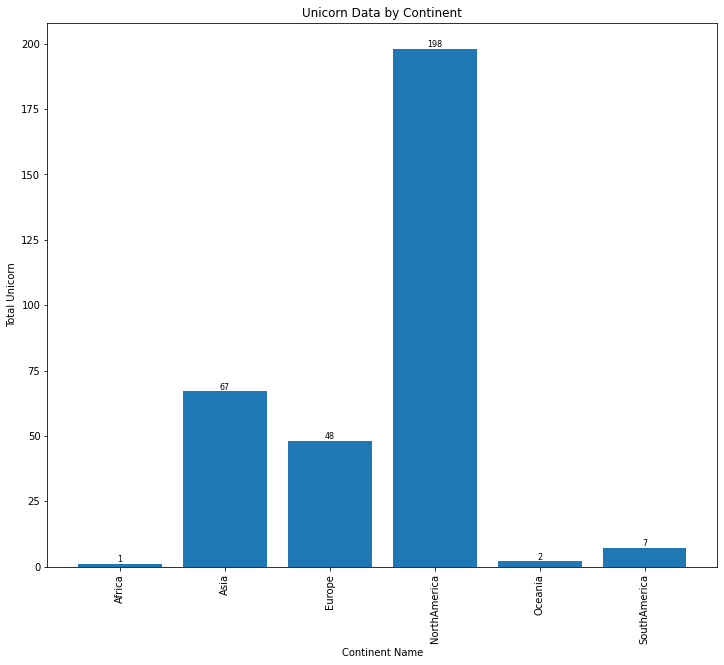

In [141]:
import matplotlib.pyplot as plt

continent = [con for con, df in unicorn_df.groupby('Continent')]
grouped_qty = unicorn_df.groupby('Continent').count()['Company']

fig, ax = plt.subplots(figsize=(12,10))
plt.bar(continent, grouped_qty)    
plt.xlabel("Continent Name")
plt.ylabel("Total Unicorn")
plt.xticks(continent, rotation = "vertical")
plt.title('Unicorn Data by Continent')
for index in range(len(continent)):
  ax.text(index, grouped_qty[index], grouped_qty[index], size=8, ha='center', va='bottom')
plt.show()

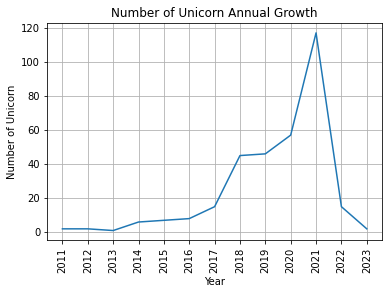

In [142]:
#grouped_year = unicorn_df[unicorn_df['Continent']=='Asia'].groupby('Year')
grouped_year = unicorn_df.groupby('Year')
result_year = grouped_year['Year'].count()
years = [yr for yr, df in grouped_year]

plt.plot(years, result_year)
plt.xticks(years, rotation = "vertical")
plt.title('Number of Unicorn Annual Growth')
plt.xlabel('Year')
plt.ylabel('Number of Unicorn')
plt.grid()
plt.show()